# Manually creating oracle to see if they are sufficient for the benchmark

In [13]:
from datasets import load_dataset


ds = load_dataset("CharlyR/vtikz", "tikz", split="benchmark")
ds = ds.select_columns(["id","type","instruction","code","image_solution","image_input","code_solution"])

chimpanzee_squint_crosseyes : Make the eyes of the chimpanzee crossed, by making them white and adding black pupils


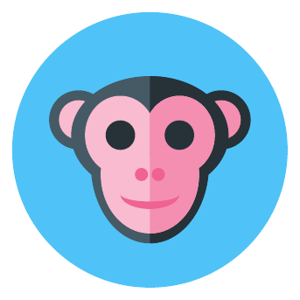

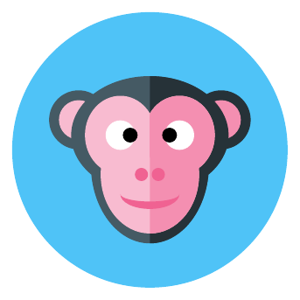

In [17]:
from IPython.display import clear_output,display,HTML
import os

for row in ds.iter(1):
    if os.path.exists(
        f"notebooks/manual_oracle_creation/oracle_functions/{row["id"][0]}.py"
    ):
        continue
    with open(
        f"notebooks/manual_oracle_creation/oracle_functions/{row["id"][0]}.py", "w"
    ) as oracle_file:
        oracle_file.write("from vif.falcon.oracle.guided_oracle.expressions import (added,removed,angle,color,placement,position,size,shape,within)\ndef test_valid_customization() -> bool:\n  ")
    print(f"{row["id"][0]} : {row["instruction"][0]}")
    display(row["image_input"][0],row["image_solution"][0][0])
    cont = input()
    if cont == "S":
        break
    clear_output()